# Lab 04 : Train vanilla neural network -- exercise


# Training a one-layer net on  FASHION-MNIST

In [30]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/gdrive')
    file_name = 'train_vanilla_nn_exercise.ipynb'
    import subprocess
    path_to_file = subprocess.check_output('find . -type f -name ' + str(file_name), shell=True).decode("utf-8")
    print(path_to_file)
    path_to_file = path_to_file.replace(file_name,"").replace('\n',"")
    os.chdir(path_to_file)
    !pwd

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import utils

### Download the TRAINING SET (data+labels)

In [32]:
from utils import check_fashion_mnist_dataset_exists
data_path=check_fashion_mnist_dataset_exists()

train_data=torch.load(data_path+'fashion-mnist/train_data.pt')
train_label=torch.load(data_path+'fashion-mnist/train_label.pt')
print(train_data.size())
print(train_label.size())

torch.Size([60000, 28, 28])
torch.Size([60000])


### Download the TEST SET (data only)

In [33]:
test_data=torch.load(data_path+'fashion-mnist/test_data.pt')
print(test_data.size())

torch.Size([10000, 28, 28])


### Make a one layer net class

In [34]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super(one_layer_net , self).__init__()
        
        # complete here
        self.mylayer = nn.Linear(input_size, output_size, bias = False)
        
    def forward(self, x):
        
        x = self.mylayer(x)
        p = F.softmax(x, dim=1)
        
        return p

### Build the net

In [35]:
net=one_layer_net(784,10)
print(net)

one_layer_net(
  (mylayer): Linear(in_features=784, out_features=10, bias=False)
)


### Take the 4th image of the test set:

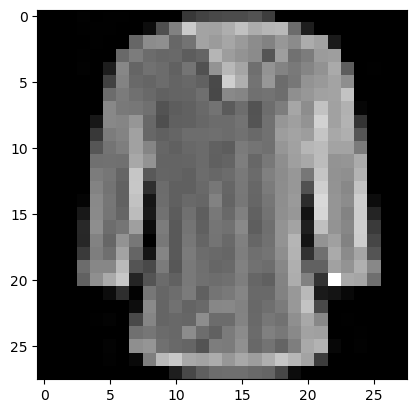

In [36]:
im = test_data[4]
utils.show(im)

### And feed it to the UNTRAINED network:

In [37]:
p = net(im.view(1,784))
print(p)

tensor([[0.0805, 0.0940, 0.0954, 0.0797, 0.0891, 0.0641, 0.1320, 0.1073, 0.0898,
         0.1679]], grad_fn=<SoftmaxBackward>)


### Display visually the confidence scores

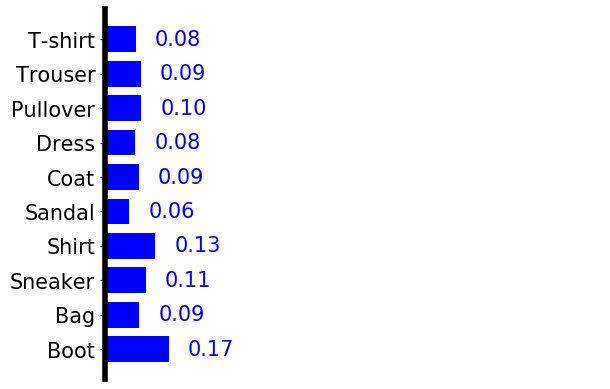

In [38]:
utils.show_prob_fashion_mnist(p)

### Train the network (only 5000 iterations) on the train set

In [39]:
criterion = nn.NLLLoss()
optimizer=torch.optim.SGD(net.parameters() , lr=0.01 )

for iter in range(1,5000):
    
    # choose a random integer between 0 and 59,999 
    # extract the corresponding picture and label
    # and reshape them to fit the network
    idx = randint(0, 59999)
    input = train_data[idx].view(1, 784)
    label = train_label[idx].view(1)

    # feed the input to the net  
    input.requires_grad_() # for backprobagation -- we will discuss it later
    prob = net(input)
 
    # update the weights (all the magic happens here -- we will discuss it later)
    log_prob=torch.log(prob)
    loss = criterion(log_prob, label)    
    optimizer.zero_grad()       
    loss.backward()
    optimizer.step()

### Take the 34th image of the test set:

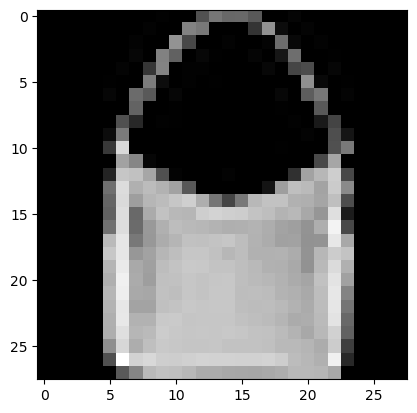

In [40]:
im = test_data[34]
utils.show(im)

### Feed it to the TRAINED net:

In [41]:
p = net(im.view(1,784))
print(p)

tensor([[6.4732e-04, 2.1396e-05, 5.5238e-03, 5.0491e-03, 1.0980e-02, 6.1283e-02,
         3.7357e-03, 4.6317e-04, 9.1226e-01, 4.1702e-05]],
       grad_fn=<SoftmaxBackward>)


### Display visually the confidence scores

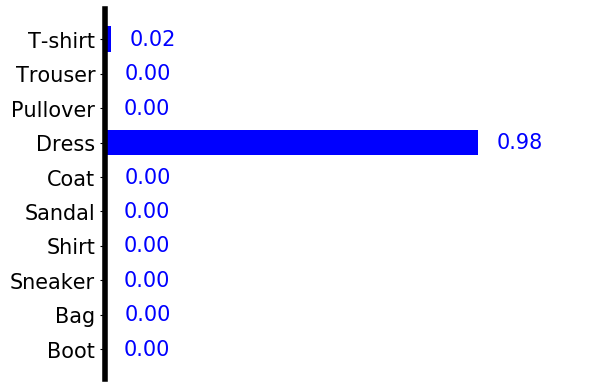

In [42]:
utils.show_prob_fashion_mnist(prob)

### Choose image at random from the test set and see how good/bad are the predictions

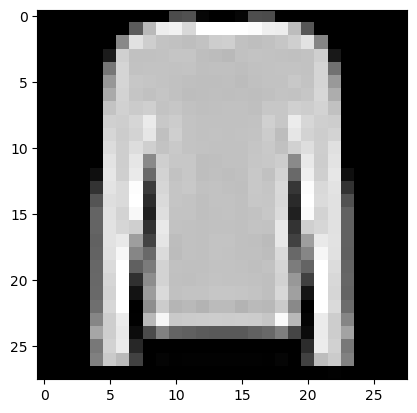

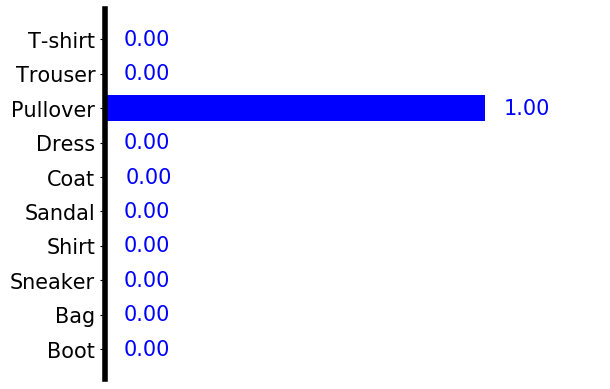

In [51]:
# choose a picture at random
idx=randint(0, 10000-1)
im=test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
prob =  net( im.view(1,784)) 
utils.show_prob_fashion_mnist(prob)